# V.1


## a.

Plotting...
Saving fig to png...
Done ploting
...


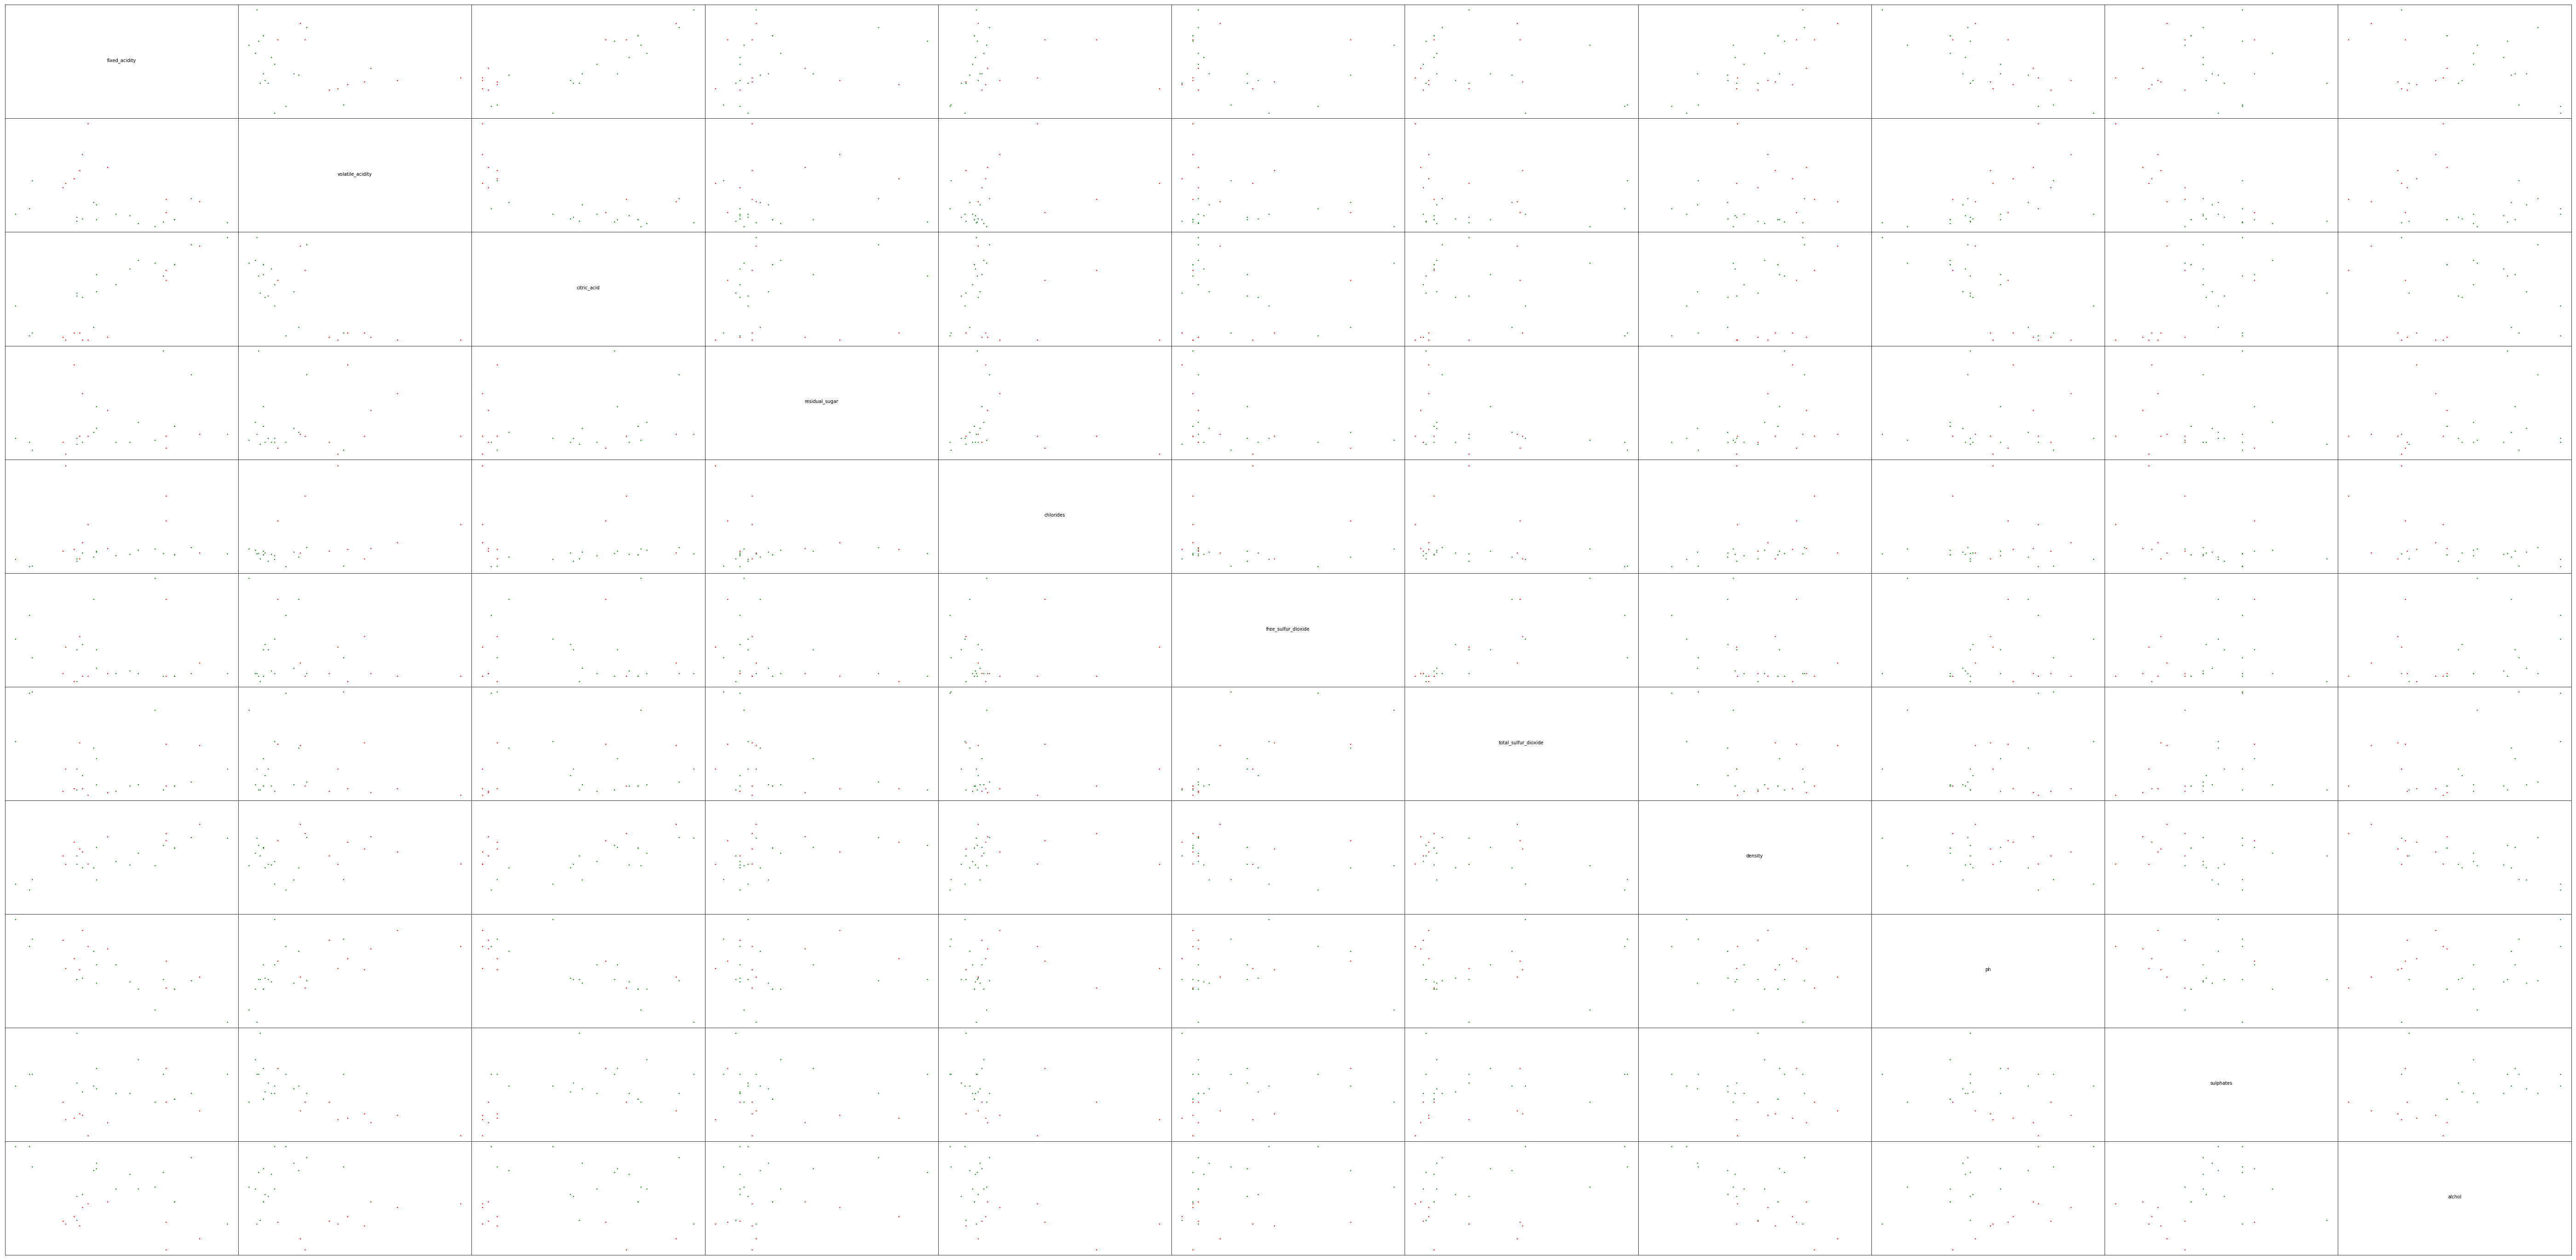

Done.


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import csv

axes = ["fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", "chlorides", "free_sulfur_dioxide",
        "total_sulfur_dioxide", "density", "ph", "sulphates", "alchol", "quality"]
        
class plot_data:
    x = []
    y = []
    colors = []
    
    def __init__(self, x, y, colors):
        self.x = x;
        self.y = y
        self.colors = colors

def read_file(file):
    wines = []
    with open(file, newline='') as csvfile:
        cread = csv.reader(csvfile, delimiter=';', quotechar='|')
        for row in cread:
            wines.append(row)
    return (wines)
        
wines_red = []
wines_red_file = 'resources/winequality-red.csv'
wines_white = []
wines_white_file = 'resources/winequality-white.csv'

wines_red = read_file(wines_red_file)
wines_white = read_file(wines_white_file)

def get_point_data(wines, xdata, ydata, good_threshold, bad_threshold, save_plot=False):
    x = []
    y = []
    colors = []
    global quality
    
    for wine in wines:
            try:
                x.append(float(wine[xdata]))
                y.append(float(wine[ydata]))
                if int(wine[11]) > good_threshold:
                    colors.append("green")
                elif int(wine[11]) < bad_threshold:
                    colors.append("red")
                else:
                    x = x[:-1]
                    y = y[:-1]
            except:
                if False:
                    print()
    return (plot_data(x, y, colors))

scalar = 2
good = 7
bad = 4

def plot_scatter_matrix(wines, good_threshold, bad_threshold, save_plot=False):
    global axes
    global scalar
    for i in range(0, 11 * 11):
        y = int(i / 11)
        x = i % 11
        ax = plt.subplot(11, 11, i + 1)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        plt.xticks([], [])
        plt.yticks([], [])
        if x == y:
            plt.text(.5, .5, axes[x], ha='center')
        else:
            data = get_point_data(wines, x, y, good_threshold, bad_threshold)
            plt.scatter(data.x, data.y, c=data.colors, s=scalar)
    if save_plot == True:
        print("Saving fig to png...")
        plt.savefig('fig.png', dpi=100)
        
print("Plotting...")
fig = plt.figure()
fig.set_size_inches((100, 50))
plt.subplots_adjust(wspace=0, hspace=0)
plot_scatter_matrix(wines_red, good, bad, save_plot=True)
print("Done ploting")
print("...")
plt.show()
print("Done.")

## b.
Alcohol, and volatile acidity seem to be more noticeable factors in wine quality. Sulphates and ph are also likely to be good choices.

Things like chlorides, density, and sulfur dioxide aren't quite as easy to view their impact linearly, which is what the perceptron model is based on.

# V.2

## a. & b.

In [10]:
import pandas as pd
import csv
import random

axes = ["fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", "chlorides", "free_sulfur_dioxide",
        "total_sulfur_dioxide", "density", "ph", "sulphates", "alcohol", "quality"]
        
wines_red = []
wines_red_file = 'resources/winequality-red.csv'
wines_white = []
wines_white_file = 'resources/winequality-white.csv'

wines_red = pd.read_csv(wines_red_file, sep=';')
wines_white = pd.read_csv(wines_white_file, sep=';')

epoch = 0
weights = []

def perceptron(wine):
    res = weights[0]
    for i in range(len(wine) - 1):
        res += weights[i + 1] * float(wine[i])
    return 1.0 if res >= 0.0 else 0.0

def train(data, l_rate=.01):
    sum_error = 0.0
    for i in range(len(data)):
        prediction = perceptron(data.iloc[i, :])
        error = prediction - data.iloc[i, -1]
        sum_error += error ** 2
        weights[0] = weights[0] - l_rate * error
        for j in range(len(data.columns) - 1):
            weights[j + 1] = weights[j + 1] - l_rate * error * data.iloc[i, j]
    return sum_error

def train_run(data, epochs=-1, l_rate=.01, verbose=False):
    performance = []
    i = 0
    while True:
        err = train(data, l_rate)
        performance.append([i, err, weights])
        if i % 250 == 0 and verbose is True:
            print("Err: {}, Epoch: {}, Weights: {}".format(err, i, weights))
        if err == 0 or i == epochs:
            print("Err: {}, Epoch: {}, Weights: {}".format(err, i, weights))
            break
        i += 1
    return performance

good_threshold = 8
bad_threshold = 3

train_data = wines_red.loc[:, ['alcohol', 'pH', 'quality']].copy()
train_data = train_data.loc[(train_data['quality'] >= good_threshold) | (train_data['quality'] <= bad_threshold)]
train_data['binary_quality'] = train_data['quality'].map({good_threshold: 1, bad_threshold: 0})

weights = [random.uniform(-1, 1) for i in range(len(train_data.columns) - 1)]
performance = train_run(train_data.loc[:, ['alcohol', 'pH', 'binary_quality']])

Err: 0.0, Epoch: 13583, Weights: [6.180538340597431, 1.7337485458555215, -7.279940336812232]


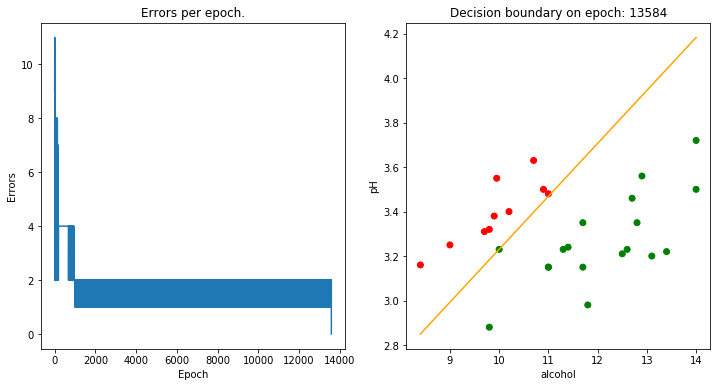

In [38]:
import matplotlib.pyplot as plt

def plot_perceptron(data):
    errs = list(zip(*data))[1]
    epoch = 0
    plt.subplots(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(errs)
    plt.ylabel('Errors')
    plt.xlabel('Epoch')
    plt.title('Errors per epoch.')
    xdata = []
    ydata = []
    colors = []
    plt.subplot(1, 2, 2)
    for i, row in train_data.iterrows():
        xdata.append(row['alcohol'])
        ydata.append(row['pH'])
        if row['quality'] == good_threshold:
            colors.append('green')
        else:
            colors.append('red')
            
    b = weights[0]
    w1 = weights[1]
    w2 = weights[2]
    minx = min(xdata)
    maxx = max(xdata)
    s = (-(b / w2) / (b / w1)) * minx + (-b / w2)
    e = (-(b / w2) / (b / w1)) * maxx + (-b / w2)
    plt.scatter(xdata, ydata, c=colors)
    plt.plot([minx, maxx], [s, e], c='orange')
    plt.ylabel('pH')
    plt.xlabel('alcohol')
    plt.title('Decision boundary on epoch: {}'.format(len(errs)))
    plt.show()
    
plot_perceptron(performance)